In [24]:
import pandas as pd

import syft as sy
import numpy as np

In [51]:
canada_customer_data = pd.read_csv("Mall_Customers.csv")
print(canada_customer_data.shape)
canada_customer_data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
canada_customer_data = canada_customer_data.rename({"Genre": "Gender"}, axis=1)
canada_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
canada_customer_data["Male"] = canada_customer_data.Gender.apply(lambda x: 1 if x == "Male" else 0)
canada_customer_data["Female"] = canada_customer_data.Gender.apply(lambda x: 1 if x == "Female" else 0)
canada_customer_data = canada_customer_data.drop(['Gender'], axis=1)
# canada_customer_data = canada_customer_data.iloc[:, 1:]
canada_customer_data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,1,19,15,39,1,0
1,2,21,15,81,1,0
2,3,20,16,6,0,1
3,4,23,16,77,0,1
4,5,31,17,40,0,1
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,1
197,198,32,126,74,1,0
198,199,32,137,18,1,0


In [ ]:
# canada_customer_values = canada_customer_data[['Age', 'Annual Income (k$)', 
#                                                'Spending Score (1-100)', 'Male', 'Female']].to_numpy()

customer_age = canada_customer_data['Age'].to_numpy()
customer_income = canada_customer_data['Annual Income (k$)'].to_numpy()
customer_spend = canada_customer_data['Spending Score (1-100)'].to_numpy()
customer_male = canada_customer_data['Male'].to_numpy()
customer_female = canada_customer_data['Female'].to_numpy()

In [56]:
customer_id = canada_customer_data["CustomerID"]

age_tensor = sy.Tensor(child=customer_age).private(min_val=0, max_val=2e12, data_subjects=customer_id)
income_tensor = sy.Tensor(child=customer_income).private(min_val=0, max_val=2e12, data_subjects=customer_id)
spend_tensor = sy.Tensor(child=customer_spend).private(min_val=0, max_val=2e12, data_subjects=customer_id)
male_tensor = sy.Tensor(child=customer_male).private(min_val=0, max_val=2e12, data_subjects=customer_id)
female_tensor = sy.Tensor(child=customer_female).private(min_val=0, max_val=2e12, data_subjects=customer_id)

In [57]:
domain = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into jovial_olah... done!


In [58]:
domain.load_dataset(
    assets={
        "age": age_tensor,
        "income": income_tensor,
        "spend": spend_tensor,
        "male?": male_tensor,
        "female?": female_tensor
    }, name="Customer data in a Mall in Canada", 
    description="This dataset contains information about 200 customers from a Mall in Canada. Columns" \
    "include Age, Annual Income (k$), Spending Score (1-100), Male, Female"
)

kj/filesystem-disk-unix.c++:1690: warning: PWD environment variable doesn't match current directory; pwd = /Users/zarreennaowalreza/Documents/openmined-new


Loading dataset... uploading...🚀                        

Uploading `female?`: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 97.05it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


In [59]:
domain.datasets

Idx,Name,Description,Assets,Id
[0],Canada Imports and Exports Feb 2021,This dataset contains information about all of Canada's imports and exports in the month of Feb 2021. Measured in USD.,"[""imports""] -> [""exports""] ->",d55ad7d0-24e4-4e24-a571-9b5b41940879
[1],Customer data in a Mall in Canada,"This dataset contains information about 200 customers from a Mall in Canada. Columnsinclude Age, Annual Income (k$), Spending Score (1-100), Male, Female","[""age""] -> [""income""] -> [""spend""] -> ...",688a2ae6-75e3-462d-a5dd-5aa295f58070


In [60]:
domain.create_user(
    name="Zarreen", 
    email="znr@openmined.org", 
    password="sherlock", 
    budget=10
)

User created successfully!


{'name': 'Zarreen',
 'email': 'znr@openmined.org',
 'password': 'sherlock',
 'url': 'localhost'}

In [ ]:
domain.requests.pandas

### Sanity Checking

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [68]:
def graph_histogram(x):
    """
    adapted from https://github.com/ugis22/clustering_analysis/blob/master/clustering_analysis.ipynb
    """
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

/Users/zarreennaowalreza/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



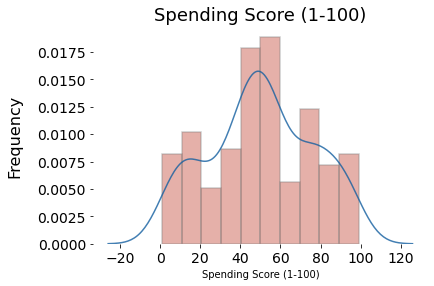

In [69]:
graph_histogram(canada_customer_data["Spending Score (1-100)"])

In [48]:
customer_id = canada_customer_data["CustomerID"].to_numpy().reshape(200, 1)